In [10]:
import pandas as pd

In [11]:
#Loading the datasets
transactions = pd.read_excel('QVI_transaction_data.xlsx')
customers = pd.read_csv('QVI_purchase_behaviour.csv') 

# Displaying a few rows
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [13]:
#The date is not readable for our analysis, I am therefore changing its datatype to a more readable data type for analysis.

In [14]:
transactions['DATE'] = pd.to_datetime(transactions['DATE'], unit='D', origin='1899-12-30')

transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [15]:
transactions['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [16]:
#To remove salsa products 
transactions = transactions [ ~transactions['PROD_NAME'].str.lower().str.contains('salsa')]
len(transactions)

246742

In [17]:
#finding the outlier based on how many packets were bought
transactions.sort_values(by= "PROD_QTY" , ascending = False).head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
69486,2019-05-16,45,45006,40460,37,Smiths Thinly Swt Chli&S/Cream175G,5,15.0
69483,2018-08-15,43,43126,39445,25,Pringles SourCream Onion 134g,5,18.5
69474,2018-08-18,33,33138,30332,68,Pringles Chicken Salt Crips 134g,5,18.5
69472,2018-08-17,32,32193,29196,110,WW Original Corn Chips 200g,5,9.5


In [18]:
#removing the outlier by eliminating the customer with 200 purchases of chips
transactions = transactions[transactions['LYLTY_CARD_NBR'] != 226000]

transactions.sort_values(by="PROD_QTY", ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
80732,2019-05-18,49,49309,45816,30,Doritos Corn Chips Cheese Supreme 170g,5,22.0
17145,2018-08-16,202,202289,202104,42,Doritos Corn Chip Mexican Jalapeno 150g,5,19.5
117547,2019-05-19,81,81120,80285,46,Kettle Original 175g,5,27.0
99458,2018-08-17,138,138085,141016,40,Thins Chips Seasonedchicken 175g,5,16.5
28135,2018-08-20,51,51263,46961,3,Kettle Sensations Camembert & Fig 150g,5,23.0


In [19]:
len(transactions)

246740

In [20]:
#looking for a missing date in the dataset
transactions['DATE'].nunique()

364

In [21]:
#One day is missing, but which day is it? Group the data by date so to count how many transactions happened each day
daily_sales = transactions.groupby('DATE').size()

#To show the days with the least number of transactions
daily_sales.sort_values().head()

DATE
2019-06-13    607
2018-09-22    609
2018-11-25    610
2018-10-18    611
2019-06-24    612
dtype: int64

In [22]:
customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [23]:
#To see all the different types of lifestages of the customers we have
customers['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [24]:
# To See the spending categories in numbers
customers['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [25]:
#In this part, I join the two datasets based on the loyalty card number as this is what both datasets have in common.

data = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='left')

# Showing dthe first few rows of our new joined dataset
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [26]:
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [27]:
# Grouping by the customer types and sum up their total sales
sales_summary = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Sorting it so the people who spend the most are at the top
sales_summary.sort_values(by='TOT_SALES', ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


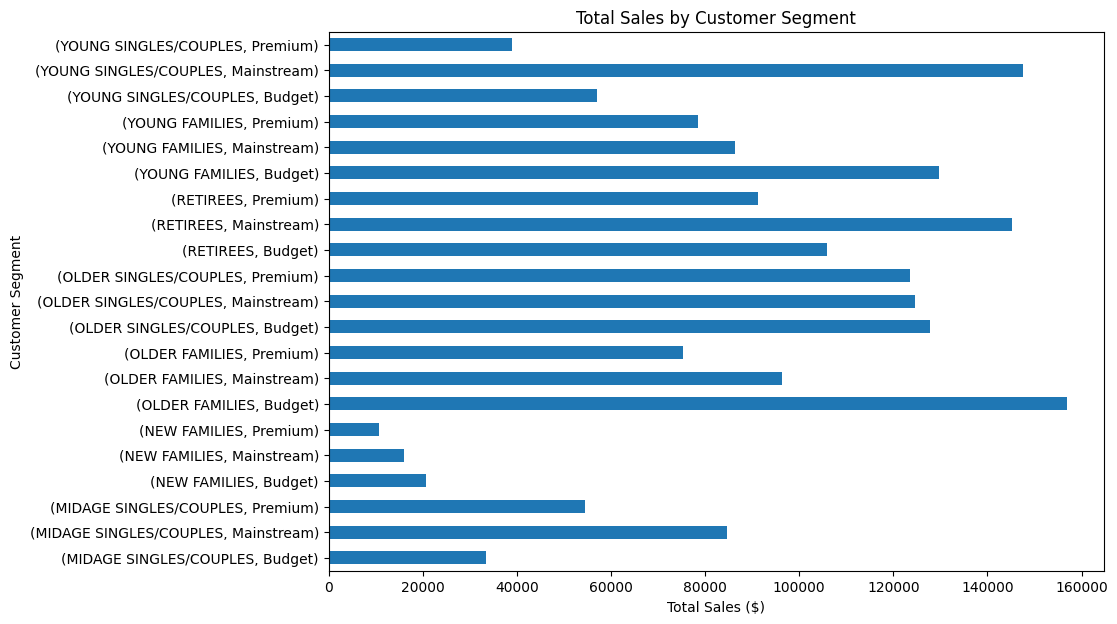

In [28]:
#To plot the Lifestage and Premium category together
import matplotlib.pyplot as plt

data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().plot(kind='barh', figsize=(10, 7))

plt.title('Total Sales by Customer Segment')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Segment')
plt.show()

In [29]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


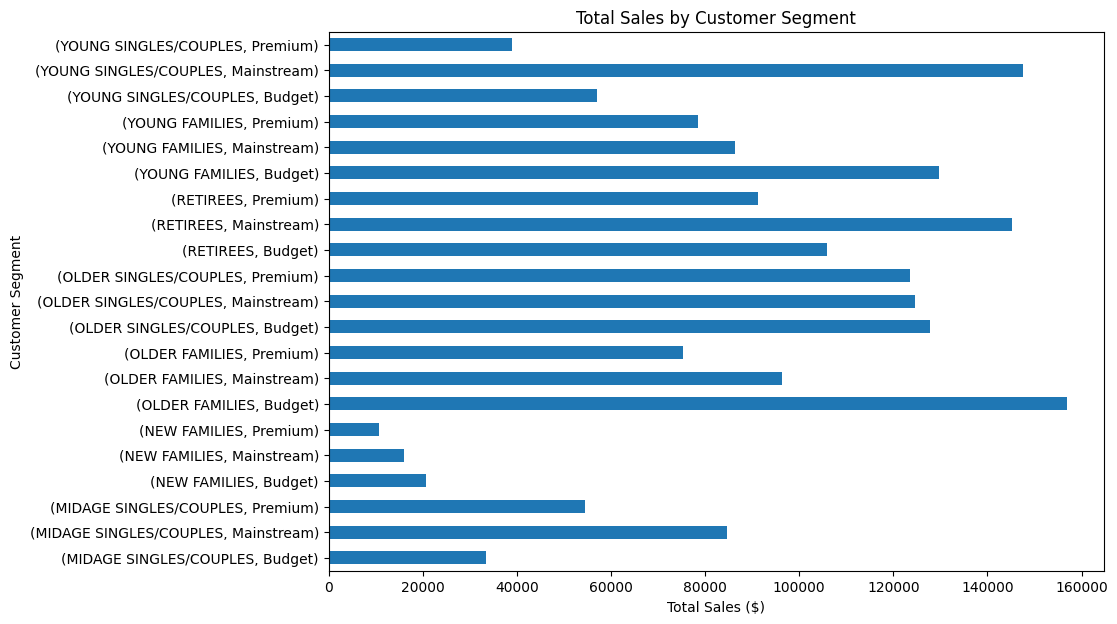

In [30]:
#To plot the Lifestage and Premium category together
import matplotlib.pyplot as plt

data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().plot(kind='barh', figsize=(10, 7))

plt.title('Total Sales by Customer Segment')
plt.xlabel('Total Sales ($)')
plt.ylabel('Customer Segment')
plt.show()

In [33]:
#To know which brand is bought the most, the PROD_NAME column is used by splitting it into words, and grabbing the first word
data['BRAND'] = data['PROD_NAME'].str.split().str[0]


data[['PROD_NAME', 'BRAND']].head(10)

,PROD_NAME,BRAND
0,Natural Chip Compny SeaSalt175g,Natural
1,CCs Nacho Cheese 175g,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle
5,Smiths Crinkle Chips Salt & Vinegar 330g,Smiths
6,Grain Waves Sweet Chilli 210g,Grain
7,Doritos Corn Chip Mexican Jalapeno 150g,Doritos
8,Grain Waves Sour Cream&Chives 210G,Grain
9,Smiths Crinkle Chips Salt & Vinegar 330g,Smiths


In [34]:
# This will show a list of every unique brand name created
data['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [35]:
#There are duplicates in the data, so they need to be removed

In [36]:
data['BRAND'] = data['BRAND'].replace('Red', 'Red Rock Deli')
data['BRAND'] = data['BRAND'].replace('RRD', 'Red Rock Deli')
data['BRAND'] = data['BRAND'].replace('Smith', 'Smiths')
data['BRAND'] = data['BRAND'].replace('Dorito', 'Doritos')
data['BRAND'] = data['BRAND'].replace('Infzns', 'Infuzions')
data['BRAND'] = data['BRAND'].replace('GrnWves', 'Grain Waves')
data['BRAND'] = data['BRAND'].replace('Grain', 'Grain Waves')
data['BRAND'] = data['BRAND'].replace('Snbts', 'Sunbites')
data['BRAND'] = data['BRAND'].replace('WW', 'Woolworths')
data['BRAND'] = data['BRAND'].replace('NCC', 'Natural Chip Co')
data['BRAND'] = data['BRAND'].replace('Natural', 'Natural Chip Co')

data['BRAND'].unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [38]:
#This is to see what the Mainstream Young Singles/Couples actually prefer.
#recreating the target group to make sure it uses our clean BRAND column
target_group = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]

#To see their Top 5 Brands
print("Top Brands for Young Singles")
print(target_group['BRAND'].value_counts().head(5))



Top Brands for Young Singles
BRAND
Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: count, dtype: int64


In [40]:
# Creating a new column called PACK_SIZE to know the size of the packets being bought, we look at PROD_NAME and extract the numbers
data['PACK_SIZE'] = data['PROD_NAME'].str.extract(r'(\d+)').astype(float)

data[['PROD_NAME', 'PACK_SIZE']].head()

,PROD_NAME,PACK_SIZE
0,Natural Chip Compny SeaSalt175g,175.0
1,CCs Nacho Cheese 175g,175.0
2,Smiths Crinkle Cut Chips Chicken 170g,170.0
3,Smiths Chip Thinly S/Cream&Onion 175g,175.0
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150.0


In [41]:
# Filtering for the target group again
target_group = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Counting the pack sizes they buy most often
target_group['PACK_SIZE'].value_counts().head(5)

PACK_SIZE
175.0    4997
150.0    3080
134.0    2315
110.0    2051
170.0    1575
Name: count, dtype: int64

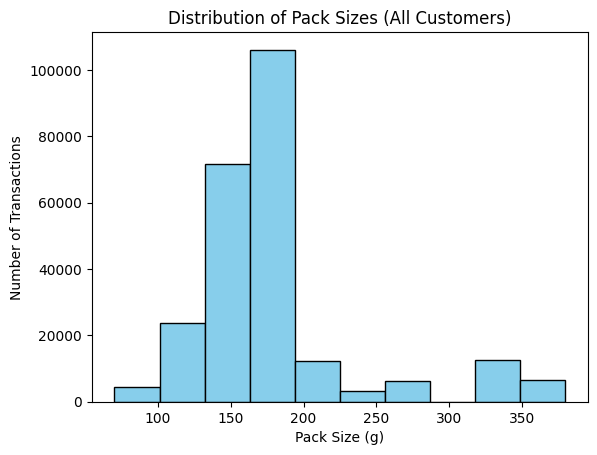

In [42]:
#Creating a histogram to see the spread of bag sizes across the whole store
plt.hist(data['PACK_SIZE'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Pack Sizes (All Customers)')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.show()